(60667, 3)
                 271358880  271358880.1  271358880.2
N_unmapped                                          
N_multimapping     7948621      7948621      7948621
N_noFeature        2220702     56855712      2971619
N_ambiguous       11791356       316197      6621674
ENSG00000284662          0            0            0
ENSG00000186827       3355            5         3350


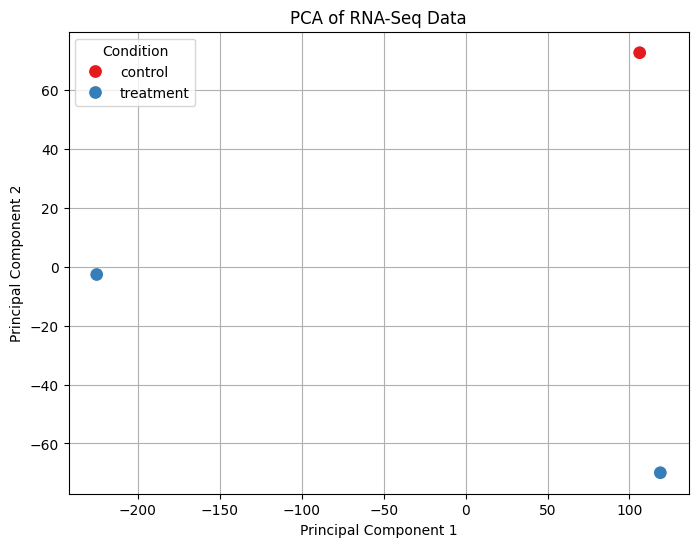

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the count data (adjust the path to your "output_ReadsPerGene.out.tab" file)
count_data = pd.read_csv('output_ReadsPerGene.out.tab', sep='\t', index_col=0)

# Check the shape of the count data (rows: genes, columns: samples)
print(count_data.shape)

# Check the first few rows to understand the data
print(count_data.head())

# Create a metadata (sample information) dataframe
# Replace this with your actual experimental conditions based on the number of samples you have
# For example, if you have 3 samples, define the conditions accordingly
metadata = pd.DataFrame({
    'condition': ['control', 'treatment', 'treatment']  # Adjust this based on your experiment
}, index=count_data.columns)

# Normalize the count data using log transformation (optional but recommended)
normalized_data = np.log2(count_data + 1)  # Adding 1 to avoid log(0)

# Standardize the data (important for PCA to work properly)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(normalized_data.T)  # Transpose the data to have samples as rows

# Perform PCA
pca = PCA(n_components=2)  # We will plot the first two principal components
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'], index=normalized_data.columns)

# Add condition labels to the PCA DataFrame
pca_df['condition'] = metadata['condition']

# Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='condition', palette='Set1', s=100)
plt.title('PCA of RNA-Seq Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Condition')
plt.grid(True)
plt.show()



In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the STAR output counts file (ReadsPerGene.out.tab)
gene_counts = pd.read_csv('/uufs/chpc.utah.edu/common/home/u0962361/RNAseq/Semester_Project/output_ReadsPerGene.out.tab', sep='\t', index_col=0)

# Optionally log-transform the data (log2 transformation)
log_gene_counts = np.log2(gene_counts + 1)

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_gene_counts.T)  # Transpose to have samples as rows

# Set the number of PCA components you want to compute
N = 5  # Change this value to the number of PCs you want

# Perform PCA for N components
pca = PCA(n_components=N)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(N)])

# Plot the first two principal components (PC1 vs. PC2)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title(f"PCA of Gene Expression (First 2 of {N} Components)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plot the explained variance ratio for each component
plt.figure(figsize=(8, 6))
sns.barplot(x=np.arange(1, N+1), y=pca.explained_variance_ratio_)
plt.title(f"Explained Variance Ratio of the First {N} PCA Components")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Optionally, you can print the amount of variance explained by each component
print("Explained Variance Ratio per component:")
print(pca.explained_variance_ratio_)

# Check how many genes have low expression
low_expression_threshold = 1  # Log2 threshold for low expression (adjust as needed)
lowly_expressed_genes = log_gene_counts.mean(axis=1) < low_expression_threshold
lowly_expressed_count = lowly_expressed_genes.sum()

print(f"Number of lowly expressed genes: {lowly_expressed_count}")


ValueError: n_components=5 must be between 0 and min(n_samples, n_features)=3 with svd_solver='full'

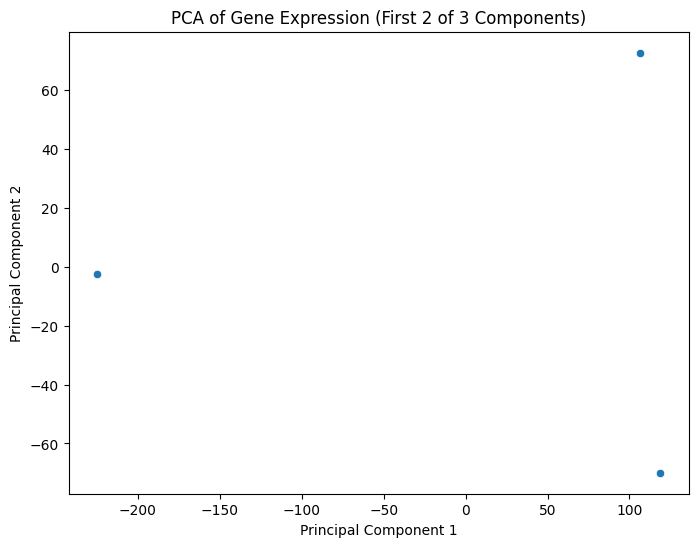

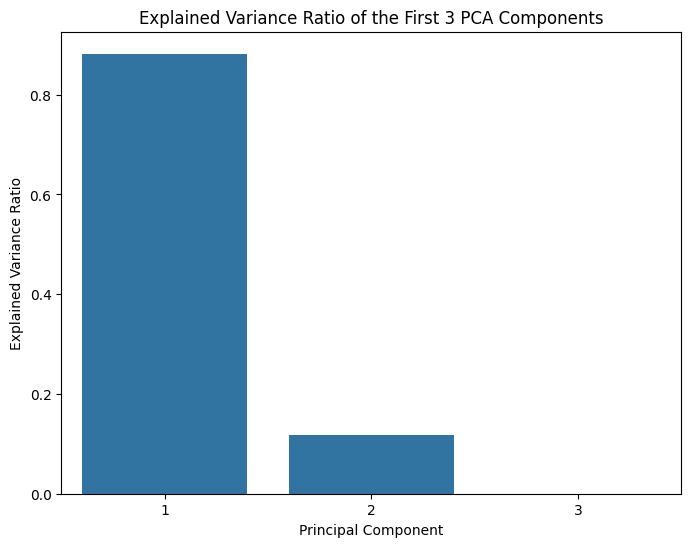

Explained Variance Ratio per component:
[8.82108673e-01 1.17891327e-01 4.08070013e-27]
Number of lowly expressed genes: 33986


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the STAR output counts file (ReadsPerGene.out.tab)
gene_counts = pd.read_csv('/uufs/chpc.utah.edu/common/home/u0962361/RNAseq/Semester_Project/output_ReadsPerGene.out.tab', sep='\t', index_col=0)

# Optionally log-transform the data (log2 transformation)
log_gene_counts = np.log2(gene_counts + 1)

# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(log_gene_counts.T)  # Transpose to have samples as rows

# Set the number of PCA components based on the minimum of samples or features
N = min(gene_counts.shape[0], gene_counts.shape[1])  # min(n_samples, n_features)

# Perform PCA for N components
pca = PCA(n_components=N)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(N)])

# Plot the first two principal components (PC1 vs. PC2)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title(f"PCA of Gene Expression (First 2 of {N} Components)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plot the explained variance ratio for each component
plt.figure(figsize=(8, 6))
sns.barplot(x=np.arange(1, N+1), y=pca.explained_variance_ratio_)
plt.title(f"Explained Variance Ratio of the First {N} PCA Components")
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Optionally, you can print the amount of variance explained by each component
print("Explained Variance Ratio per component:")
print(pca.explained_variance_ratio_)

# Check how many genes have low expression
low_expression_threshold = 1  # Log2 threshold for low expression (adjust as needed)
lowly_expressed_genes = log_gene_counts.mean(axis=1) < low_expression_threshold
lowly_expressed_count = lowly_expressed_genes.sum()

print(f"Number of lowly expressed genes: {lowly_expressed_count}")

